In [124]:
# Downloading data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lazyh\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [125]:
# The 4 essential libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# importing and viewing data
df = pd.read_csv('Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Preprocessing

In [127]:
# Checking for null values and amount of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null Values

In [129]:
# checking for numeric data and their properties
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [130]:
# Renaming col
df.rename(columns={'tenure':'MonthStayed'}, inplace=True)

# Exploration

In [131]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [132]:
df.drop('customerID', axis=1, inplace=True)

In [133]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [134]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [135]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MonthStayed',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [136]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

### Dealing with Non_Numeric Data

There is already phone service and internet service columns so no_internet data on other columns is redundant

In [137]:
def replace_phone(x):
    if x == 'No phone service':
        n = 'No'
        return n.capitalize()
    return x

In [138]:
df['MultipleLines'] = df['MultipleLines'].apply(replace_phone)

In [139]:
df['MultipleLines']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042     No
Name: MultipleLines, Length: 7043, dtype: object

In [140]:
# Making sure spelling is right
df[df['OnlineSecurity'] == 'No internet service']

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [141]:
def replace_phone(x):
    if x == 'No internet service':
        n = 'No'
        return n.capitalize()
    return x

In [142]:
for col, data in df.items():
    if col != 'InternetService':
        df[col] = df[col].apply(lambda x: replace_phone(x) if x == 'No internet service' else x)

In [143]:
df

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Dealing with Yes, No Entries

In [144]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [145]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['No','Yes']])

In [146]:
yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 
        'PaperlessBilling', 'Churn']
df[yes_no]

for x, y in df[yes_no].items():
    df[x] = oe.fit_transform(df[[x]])
df[yes_no]

,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
7039,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [147]:
df

,gender,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,Male,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0
2,Male,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,Male,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1.0,1.0,24,1.0,1.0,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1.0,Mailed check,84.80,1990.5,0.0
7039,Female,0,1.0,1.0,72,1.0,1.0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1.0,Credit card (automatic),103.20,7362.9,0.0
7040,Female,0,1.0,1.0,11,0.0,0.0,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.60,346.45,0.0
7041,Male,1,1.0,0.0,4,1.0,1.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,74.40,306.6,1.0


In [148]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

In [149]:
gender_encoded = ohe.fit_transform(df[['gender']])
gender_encoded

,gender_Female,gender_Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
7038,0.0,1.0
7039,1.0,0.0
7040,1.0,0.0
7041,0.0,1.0


In [150]:
df = df.join(gender_encoded)

In [151]:
df.drop('gender', axis=1, inplace=True)

In [152]:
df

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0,1.0,0.0
1,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,...,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0,0.0,1.0
2,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0,0.0,1.0
3,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,...,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0,0.0,1.0
4,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,1.0,1.0,DSL,1.0,0.0,1.0,...,1.0,1.0,One year,1.0,Mailed check,84.80,1990.5,0.0,0.0,1.0
7039,0,1.0,1.0,72,1.0,1.0,Fiber optic,0.0,1.0,1.0,...,1.0,1.0,One year,1.0,Credit card (automatic),103.20,7362.9,0.0,1.0,0.0
7040,0,1.0,1.0,11,0.0,0.0,DSL,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,Electronic check,29.60,346.45,0.0,1.0,0.0
7041,1,1.0,0.0,4,1.0,1.0,Fiber optic,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,Mailed check,74.40,306.6,1.0,0.0,1.0


In [153]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(['Fiber optic', 'DSL', 'No'])
df['InternetService'] = le.transform(df['InternetService'])

In [155]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [156]:
le.fit(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [157]:
df

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,0,1.0,0.0,1,0.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1.0,2,29.85,29.85,0.0,1.0,0.0
1,0,0.0,0.0,34,1.0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0.0,3,56.95,1889.5,0.0,0.0,1.0
2,0,0.0,0.0,2,1.0,0.0,0,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1.0,3,53.85,108.15,1.0,0.0,1.0
3,0,0.0,0.0,45,0.0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0.0,0,42.30,1840.75,0.0,0.0,1.0
4,0,0.0,0.0,2,1.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,2,70.70,151.65,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1.0,1.0,24,1.0,1.0,0,1.0,0.0,1.0,...,1.0,1.0,One year,1.0,3,84.80,1990.5,0.0,0.0,1.0
7039,0,1.0,1.0,72,1.0,1.0,1,0.0,1.0,1.0,...,1.0,1.0,One year,1.0,1,103.20,7362.9,0.0,1.0,0.0
7040,0,1.0,1.0,11,0.0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,2,29.60,346.45,0.0,1.0,0.0
7041,1,1.0,0.0,4,1.0,1.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1.0,3,74.40,306.6,1.0,0.0,1.0


In [158]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [159]:
oe = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

df['Contract'] = oe.fit_transform(df[['Contract']])

In [160]:
df.dtypes

SeniorCitizen         int64
Partner             float64
Dependents          float64
MonthStayed           int64
PhoneService        float64
MultipleLines       float64
InternetService       int32
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges         object
Churn               float64
gender_Female       float64
gender_Male         float64
dtype: object

In [161]:
df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

In [162]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [163]:
df.isna().sum()

SeniorCitizen        0
Partner              0
Dependents           0
MonthStayed          0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender_Female        0
gender_Male          0
dtype: int64

In [164]:
df[df['TotalCharges'].isna() == True]

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
488,0,1.0,1.0,0,0.0,0.0,0,1.0,0.0,1.0,...,1.0,0.0,2.0,1.0,0,52.55,NaN,0.0,1.0,0.0
753,0,0.0,1.0,0,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3,20.25,NaN,0.0,0.0,1.0
936,0,1.0,1.0,0,1.0,0.0,0,1.0,1.0,1.0,...,1.0,1.0,2.0,0.0,3,80.85,NaN,0.0,1.0,0.0
1082,0,1.0,1.0,0,1.0,1.0,2,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3,25.75,NaN,0.0,0.0,1.0
1340,0,1.0,1.0,0,0.0,0.0,0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1,56.05,NaN,0.0,1.0,0.0
3331,0,1.0,1.0,0,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3,19.85,NaN,0.0,0.0,1.0
3826,0,1.0,1.0,0,1.0,1.0,2,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3,25.35,NaN,0.0,0.0,1.0
4380,0,1.0,1.0,0,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,3,20.00,NaN,0.0,1.0,0.0
5218,0,1.0,1.0,0,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3,19.70,NaN,0.0,0.0,1.0
6670,0,1.0,1.0,0,1.0,1.0,0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3,73.35,NaN,0.0,1.0,0.0


In [165]:
df.dropna(inplace=True)

In [166]:
df.dtypes

SeniorCitizen         int64
Partner             float64
Dependents          float64
MonthStayed           int64
PhoneService        float64
MultipleLines       float64
InternetService       int32
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
gender_Female       float64
gender_Male         float64
dtype: object

# EDA

In [167]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [169]:
tr = x_train.join(y_train)

In [170]:
tr

,SeniorCitizen,Partner,Dependents,MonthStayed,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Churn
4499,0,0.0,1.0,12,1.0,1.0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2,78.30,909.25,1.0,0.0,1.0
1933,0,0.0,0.0,20,1.0,0.0,2,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,3,19.70,415.90,0.0,1.0,0.0
4668,0,0.0,1.0,2,1.0,0.0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1,61.20,125.95,1.0,0.0,0.0
5681,1,1.0,0.0,34,1.0,0.0,0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0,64.20,2106.30,1.0,0.0,0.0
3610,0,0.0,0.0,12,1.0,1.0,1,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0,100.15,1164.30,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5161,0,0.0,1.0,23,1.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2,54.15,1312.45,0.0,1.0,0.0
3451,1,1.0,0.0,65,1.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0,70.95,4555.20,0.0,1.0,0.0
4135,0,1.0,1.0,36,1.0,1.0,0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1,92.90,3379.25,1.0,0.0,0.0
4249,0,1.0,1.0,10,1.0,0.0,0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,3,65.90,660.05,1.0,0.0,0.0


<Axes: >

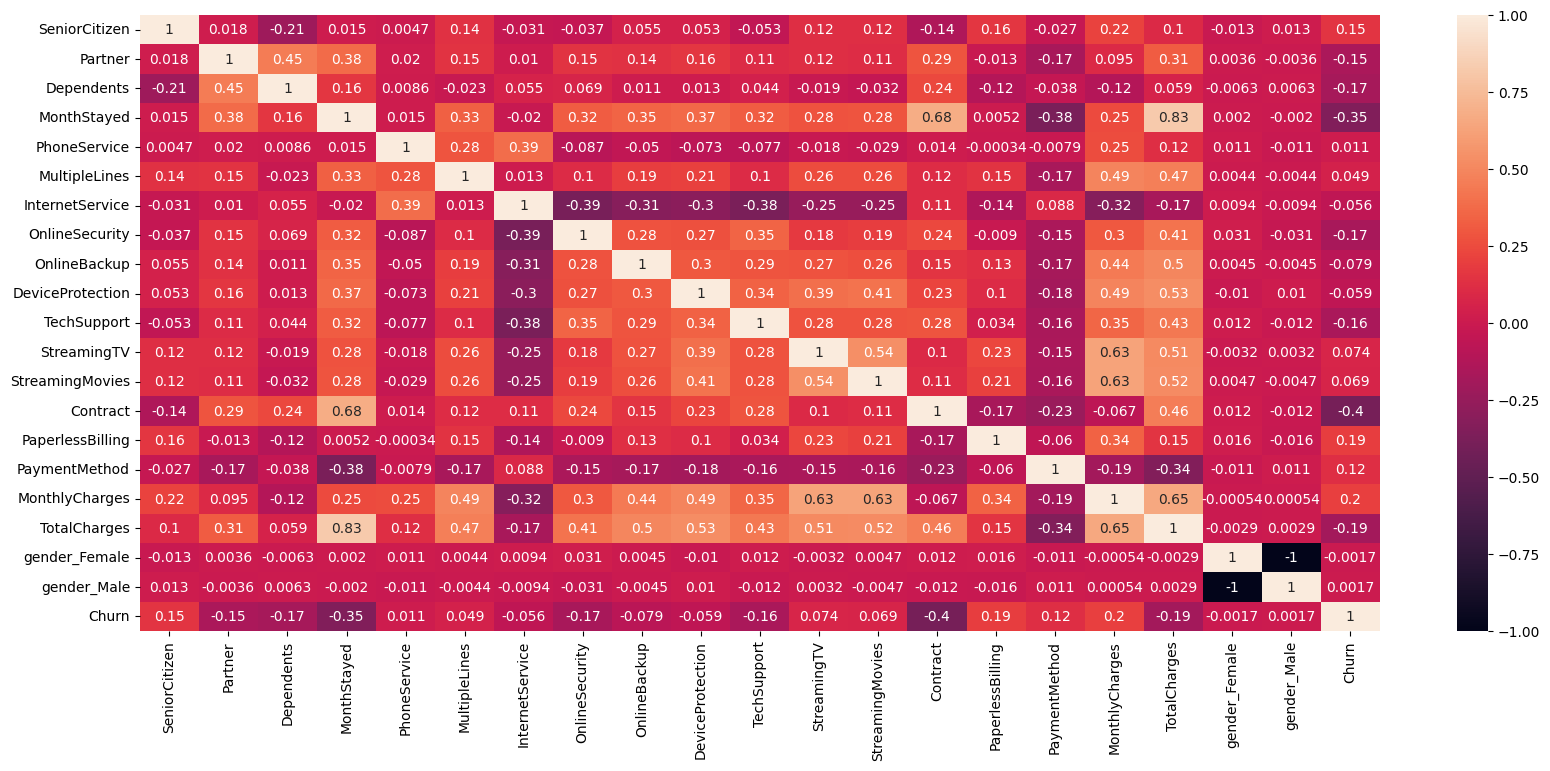

In [171]:
plt.figure(figsize=(20, 8))
sns.heatmap(tr.corr(), annot=True)

Gender has very low correlation

In [172]:
tr['gender_Female'].value_counts()

gender_Female
0.0    2469
1.0    2453
Name: count, dtype: int64

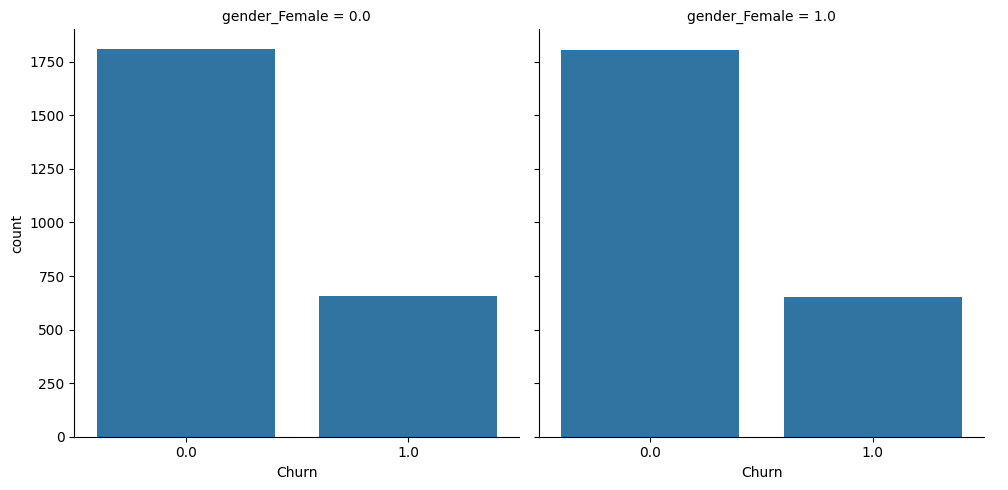

In [175]:
sns.catplot(x='Churn', col='gender_Female', kind='count', data=tr)

In [ ]:
# No difference so removing gender from the Data frame
tr.drop(['gender_Female', 'gender_Male'], axis=1, inplace=True)

<Axes: >

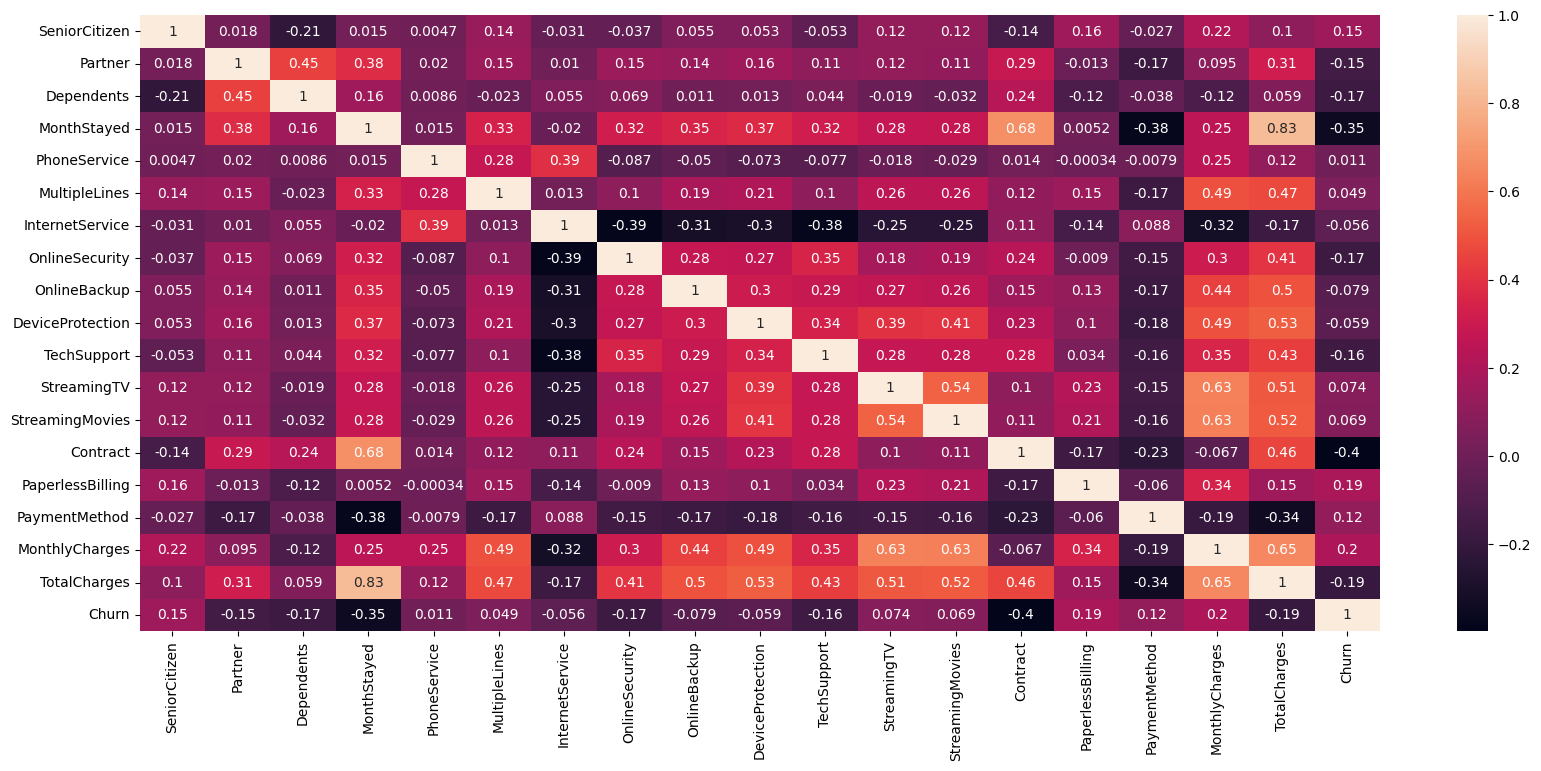

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(tr.corr(), annot=True)

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [179]:
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            
        }
    },
     'SVM':{
        'model':svm.SVC(),
        'params':{
            
        }
    }, 
     'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'params':{
            
        }
    }
}

In [180]:
scores = []
for model, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'])
    clf.fit(tr.drop('Churn', axis=1), tr['Churn'])

    scores.append({
        'model':clf.best_estimator_,
        'param':clf.best_params_,
        'score':clf.best_score_
                   })

In [181]:
scores

[{'model': RandomForestClassifier(), 'param': {}, 'score': 0.7988634393958154},
 {'model': SVC(), 'param': {}, 'score': 0.7342544674177707},
 {'model': KNeighborsClassifier(), 'param': {}, 'score': 0.767781560810532}]